In [1]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

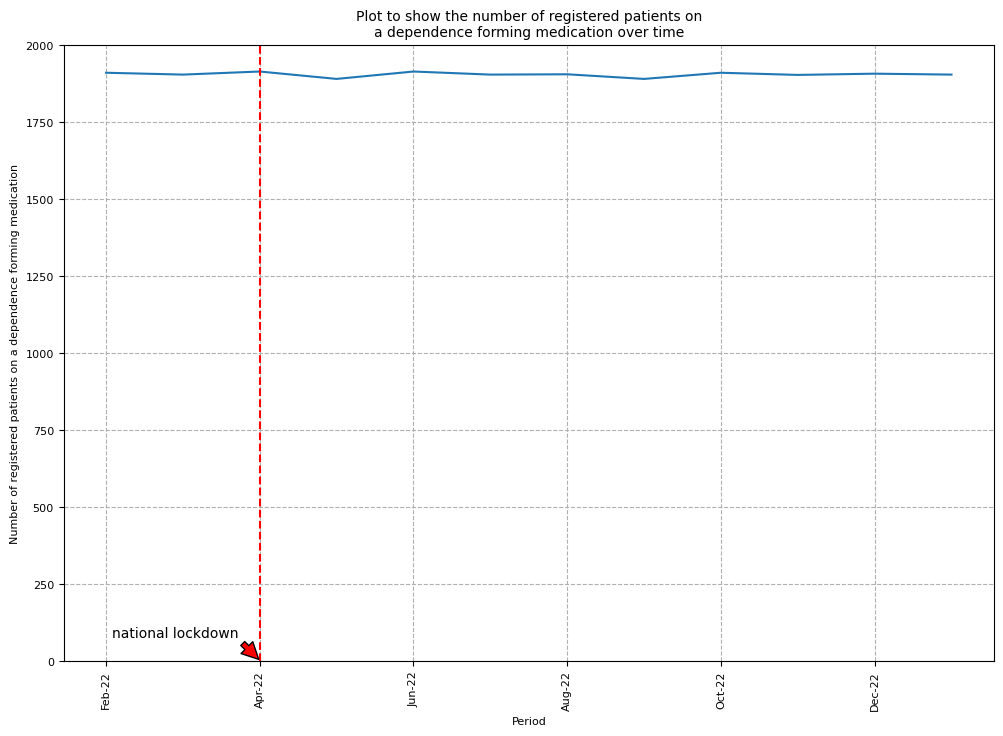

In [2]:
data_measure_medication_rate = pd.read_csv("../output/measure_medication_rate.csv", parse_dates=["date"])
data_measure_medication_rate = data_measure_medication_rate.loc[data_measure_medication_rate["research_population"] == 1, :]
df_measure_medication_rate = pd.DataFrame.pivot(data_measure_medication_rate, index='date', columns='research_population', values='with_medication')
df_measure_medication_rate.index = pd.to_datetime(df_measure_medication_rate.index).strftime('%b-%y')
ax = df_measure_medication_rate.plot(fontsize=8, figsize=(12,8))
ax.legend().remove()
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=2000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.grid(linestyle="dashed")
plt.ylim(ymin=0, ymax=2000)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_medication_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [3]:
print(tabulate(df_measure_medication_rate.iloc[:1], tablefmt = 'simple'))
print(tabulate(df_measure_medication_rate.iloc[-1:], tablefmt = 'simple'))

------  ----
Feb-22  1909
------  ----
------  ----
Jan-23  1903
------  ----


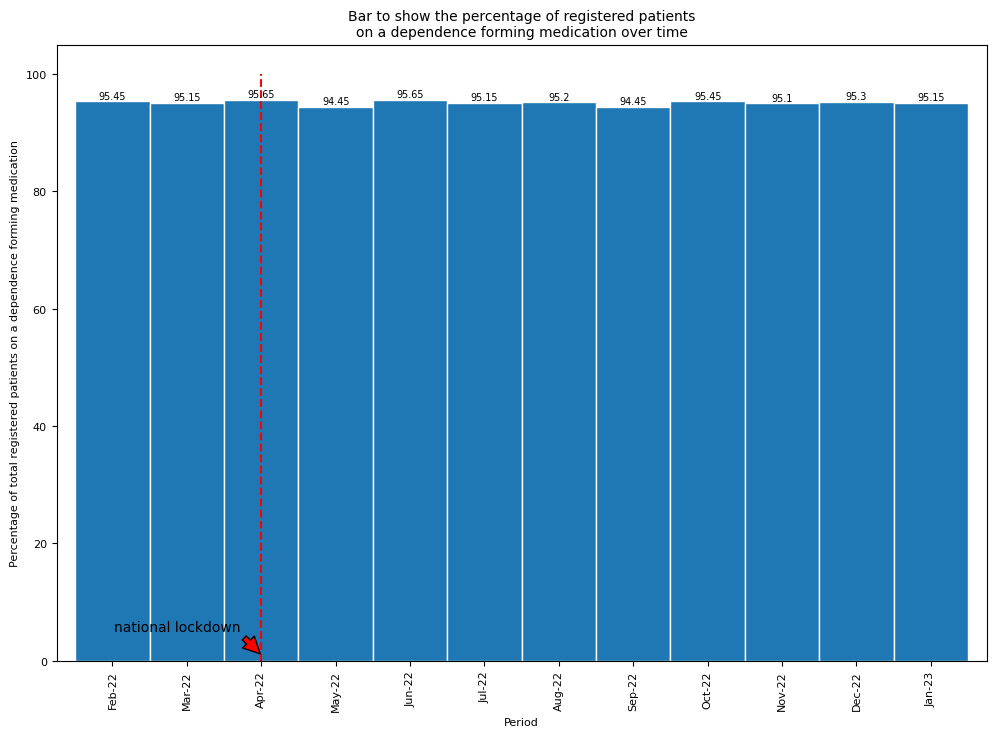

In [4]:
data_measure_medication_rate = pd.read_csv("../output/measure_medication_rate.csv", parse_dates=["date"])
data_measure_medication_rate = data_measure_medication_rate.loc[data_measure_medication_rate["research_population"] == 1, :]
data_measure_medication_rate['value'] = 100 * data_measure_medication_rate["value"]
df_measure_medication_rate = pd.DataFrame.pivot(data_measure_medication_rate, index='date', columns='research_population', values='value')
df_measure_medication_rate.index = pd.to_datetime(df_measure_medication_rate.index).strftime('%b-%y')
ax = df_measure_medication_rate.plot.bar(fontsize=8, edgecolor='white', width=1, figsize=(12,8))
ax.legend().remove()
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of total registered patients on a dependence forming medication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge', fontsize=7)
title = 'Bar to show the percentage of registered patients on a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.savefig(f"../output/measure_medication_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '..output/measure_dfm_medications_grouped_rate_plot.png'

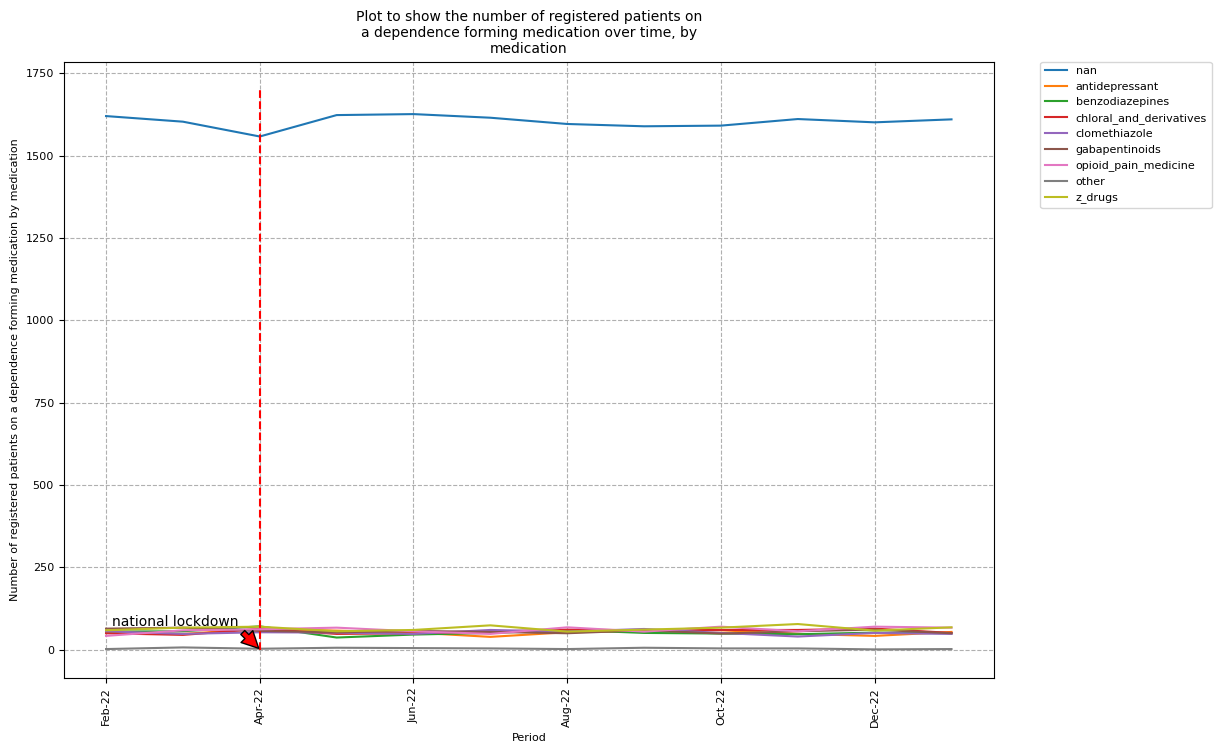

In [5]:
data_measure_dfm_medications_grouped_rate = pd.read_csv("../output/measure_dfm_medications_grouped_rate.csv", parse_dates=["date"])
df_measure_dfm_medications_grouped_rate = pd.DataFrame.pivot(data_measure_dfm_medications_grouped_rate, index='date', columns='medication', values='research_population')
df_measure_dfm_medications_grouped_rate.index = pd.to_datetime(df_measure_dfm_medications_grouped_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_grouped_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by medication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=1700,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by medication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"..output/measure_dfm_medications_grouped_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()



In [ ]:
print(tabulate(df_measure_dfm_medications_grouped_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_grouped_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Feb-22   1620                52                 55                         50               56                64                      42        2         59
date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Jan-23   1610                54                 50                         51               48                50                      67        2         68


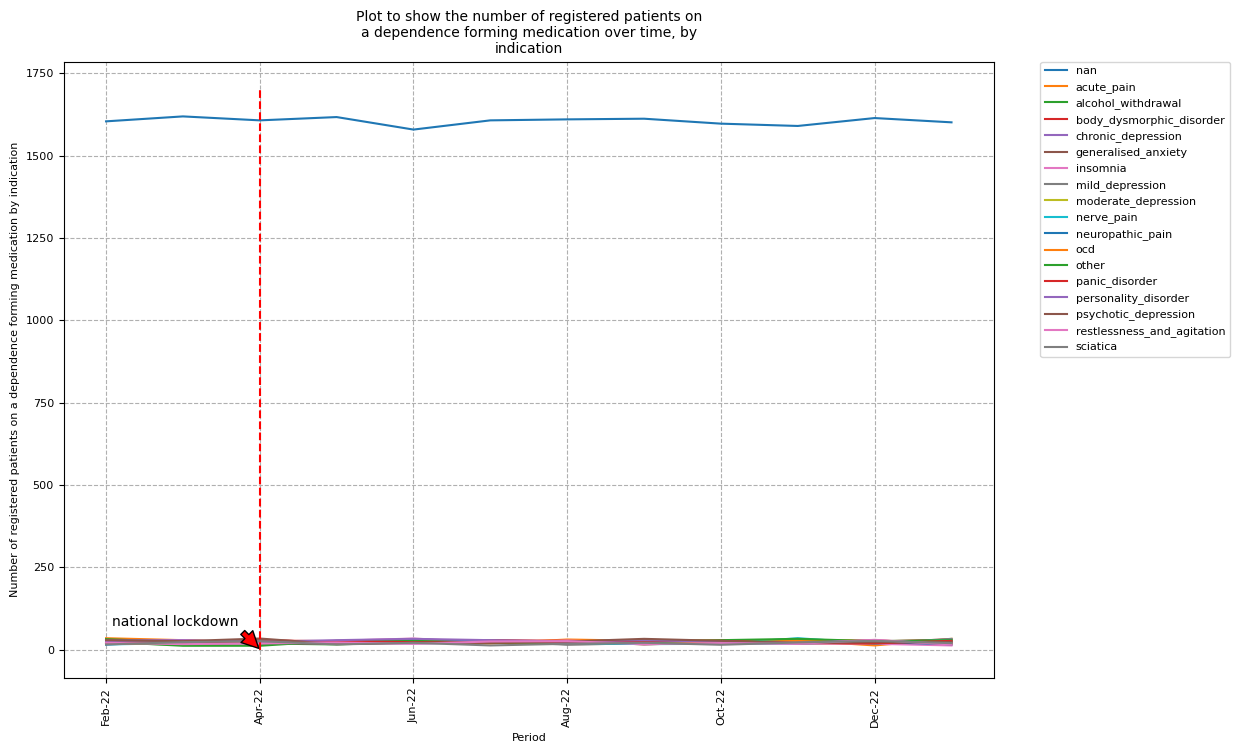

In [ ]:
data_measure_dfm_indications_grouped_rate = pd.read_csv("../output/measure_dfm_indications_grouped_rate.csv", parse_dates=["date"])
df_measure_dfm_indications_grouped_rate = pd.DataFrame.pivot(data_measure_dfm_indications_grouped_rate, index='date', columns='indication', values='research_population')
df_measure_dfm_indications_grouped_rate.index = pd.to_datetime(df_measure_dfm_indications_grouped_rate.index).strftime('%b-%y')
ax = df_measure_dfm_indications_grouped_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by indication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=1700,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by indication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_indications_grouped_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [ ]:
print(tabulate(df_measure_dfm_indications_grouped_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_indications_grouped_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      nan    acute_pain    alcohol_withdrawal    body_dysmorphic_disorder    chronic_depression    generalised_anxiety    insomnia    mild_depression    moderate_depression    nerve_pain    neuropathic_pain    ocd    other    panic_disorder    personality_disorder    psychotic_depression    restlessness_and_agitation    sciatica
------  -----  ------------  --------------------  --------------------------  --------------------  ---------------------  ----------  -----------------  ---------------------  ------------  ------------------  -----  -------  ----------------  ----------------------  ----------------------  ----------------------------  ----------
Feb-22   1604            35                    32                          23                    28                     19          26                 21                     24            16                  16     19       24                21                      26                      29                            21        

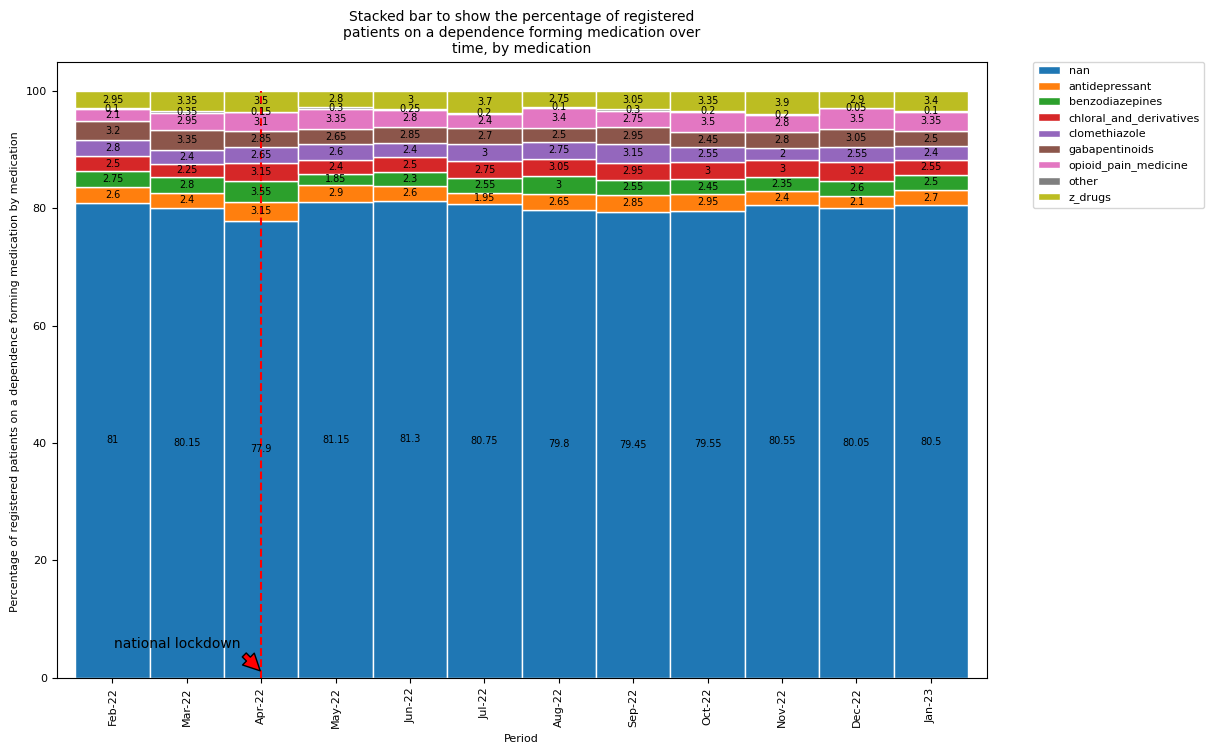

In [ ]:
df_med_stacked = pd.DataFrame(df_measure_dfm_medications_grouped_rate)
df_med_stacked.head()
tot = df_med_stacked.sum(axis=1)
per = df_med_stacked.div(tot, axis=0).mul(100).round(2)
ax = per.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by medication ', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by medication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_grouped_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()



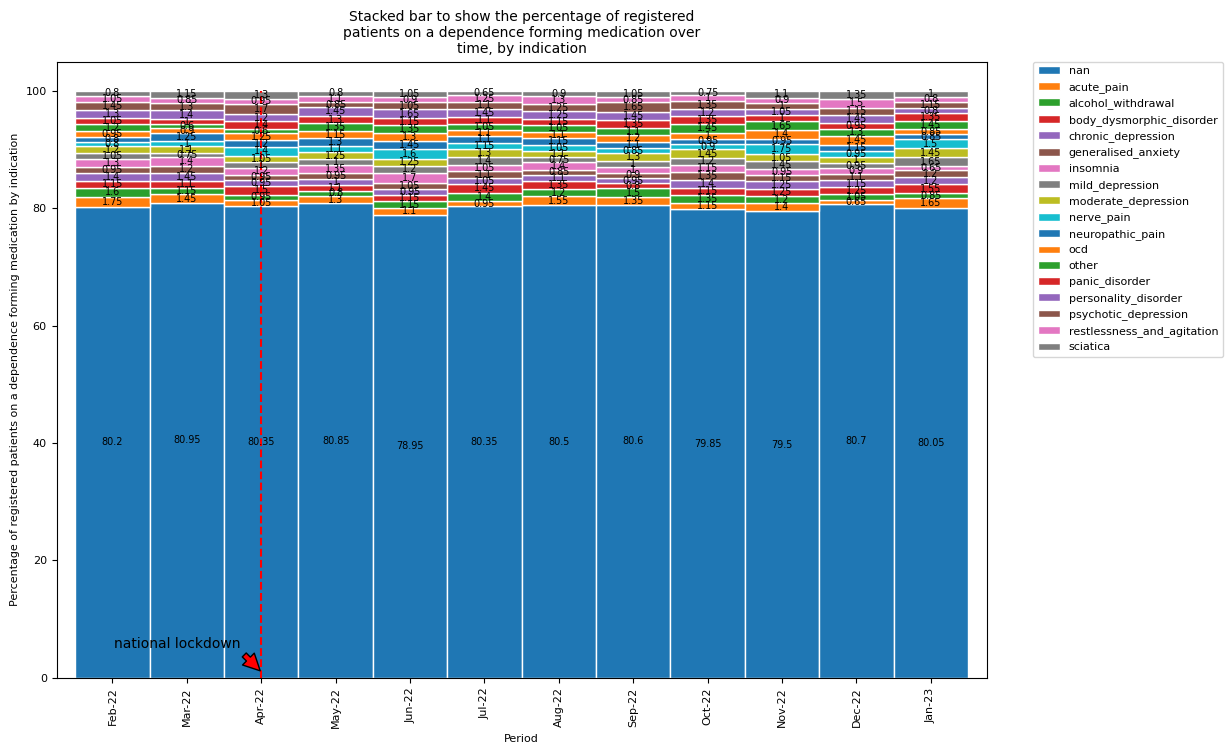

In [ ]:
df_ind_stacked = pd.DataFrame(df_measure_dfm_indications_grouped_rate)
df_ind_stacked.head()
tot = df_ind_stacked.sum(axis=1)
per = df_ind_stacked.div(tot, axis=0).mul(100).round(2)
ax = per.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by indication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by indication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_indications_grouped_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()